# Business Case for Skin Disorder Prediction



Diagnosing erythemato-squamous diseases such as psoriasis, lichen planus, and seborrheic dermatitis is a significant 
challenge due to overlapping clinical and histopathological features. These conditions often require invasive and 
time-consuming biopsies for accurate diagnosis, which delays treatment and increases patient burden.

Our project aims to develop a machine learning model using a dataset with 34 features, including clinical
and histopathological attributes. By analyzing these features—rated on a scale of 0 to 3 for severity—our 
predictive system can accurately classify skin disorders. This model offers a non-invasive, cost-effective alternative
to traditional diagnostic methods.

Integrating this solution into clinical practice will enable earlier detection, personalized treatment plans, 
and reduced reliance on biopsies. It will also empower dermatologists with a reliable decision-support tool,
enhancing diagnostic accuracy and improving patient outcomes. Ultimately, this innovation contributes to more
efficient dermatological care and better resource allocation

In [2]:
## Importing Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Loading the data
data = pd.read_csv('dataset_35_dermatology (1).csv')
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


# Using YData Profiling for Domain Analysis

In [3]:
## !pip install ydata-profiling
from ydata_profiling import ProfileReport
profile=ProfileReport(data,title="EDA",explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Domain Analysis

# Clinical features
Erythema: Indicates redness of the skin, helping diagnose inflammation-related diseases like Psoriasis or Chronic Dermatitis.

Scaling: Excessive shedding of the skin; critical in distinguishing conditions like Psoriasis or Seborrheic Dermatitis.

Definite_Borders: Presence of sharp lesion edges; aids in identifying Psoriasis and Lichen Planus.

Itching: Common in Lichen Planus and Chronic Dermatitis, helping prioritize symptomatic care.

Koebner_Phenomenon: Lesion development due to skin trauma; significant for Psoriasis diagnosis.

Polygonal_Papules: Flat, polygonal bumps are specific to Lichen Planus.

Follicular_Papules: Skin bumps affecting hair follicles; key in diagnosing Pityriasis Rubra Pilaris.

Oral_Mucosal_Involvement: Lesions in the mouth; often seen in Lichen Planus.

Knee_and_Elbow_Involvement: Lesions on joints; commonly observed in Psoriasis.

Scalp_Involvement: Affected scalp skin; helps differentiate Seborrheic Dermatitis and Psoriasis.

Family_History: Genetic predisposition is critical for diseases like Psoriasis.

# Histopathological Attributes
Melanin_Incontinence: Pigment leakage due to skin damage; common in Lichen Planus.

Eosinophils_in_the_Infiltrate: Allergic immune response marker; helps identify Chronic Dermatitis.

PNL_Infiltrate: Neutrophil presence indicates inflammation, significant in Psoriasis.

Fibrosis_of_the_Papillary_Dermis: Thickened skin layer; indicative of Chronic Dermatitis.

Exocytosis: Immune cell infiltration in the epidermis; relevant to inflammatory skin diseases.

Acanthosis: Thickened epidermis layer; a hallmark of Psoriasis.

Hyperkeratosis: Thickened outer skin layer; common in Psoriasis and Lichen Planus.

Parakeratosis: Retention of nuclei in skin cells; diagnostic of Psoriasis and Seborrheic Dermatitis.

Clubbing_of_the_Rete_Ridges: Structural skin changes, often seen in Psoriasis.

Elongation_of_the_Rete_Ridges: Skin growth pattern common in Psoriasis.

Thinning_of_the_Suprapapillary_Epidermis: Seen in Psoriasis, aids in differentiating it from other diseases.

Spongiform_Pustule: Microabscesses are characteristic of Psoriasis.

Munro_Microabscess: Neutrophil clusters in the skin; specific to Psoriasis.

Focal_Hypergranulosis: Localized thickening of the granular layer; seen in Lichen Planus.

Disappearance_of_the_Granular_Layer: Loss of skin structure; a feature of Psoriasis.

Vacuolisation_and_Damage_of_Basal_Layer: Seen in Lichen Planus and Pityriasis Rosea.

Spongiosis: Intercellular edema; diagnostic of Seborrheic Dermatitis.

Saw-Tooth_Appearance_of_Retes: Specific pattern seen in Lichen Planus.

Follicular_Horn_Plug: Hair follicle obstruction; indicates Pityriasis Rubra Pilaris.

Perifollicular_Parakeratosis: Skin scaling around follicles; significant for Pityriasis Rubra Pilaris.

Inflammatory_Mononuclear_Infiltrate: Chronic immune response marker; common in Chronic Dermatitis.

Band-Like_Infiltrate: Dense inflammatory cell pattern; a key feature of Lichen Planus.

Age: Helps correlate disease prevalence based on age groups.

Class: The target variable representing the specific skin disease to diagnose.

# Basic Checks

In [4]:
## Data Analysis 
data.head(4)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1


In [5]:
# Finding Size of dataset
data.size

12810

In [6]:
# Finding Shape of dataset
data.shape

(366, 35)

In [7]:
# Finding distribution of dataset
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [8]:
# Finding missing value of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [9]:
# Finding lenght of column
len(data.columns)

35

In [10]:
# Finding length of row
len(data.scaling)

366

In [11]:
## Finding missing terms 
data.iloc[33:37]['Age']


33    ?
34    ?
35    ?
36    ?
Name: Age, dtype: object

In [12]:
data['Age'].value_counts()

Age
40    17
50    17
36    16
27    16
22    15
      ..
58     1
49     1
63     1
68     1
75     1
Name: count, Length: 61, dtype: int64

In [4]:
# Replace '?' with NaN
data['Age'] = data['Age'].replace('?', np.nan)
# Convert Age column to numeric
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
# Replace NaN with the median of the column
median_age = data['Age'].median()
data['Age'] = data['Age'].fillna(median_age)

print(data['Age'])
data = data.apply(pd.to_numeric, errors='coerce')

0      55.0
1       8.0
2      26.0
3      40.0
4      45.0
       ... 
361    25.0
362    36.0
363    28.0
364    50.0
365    35.0
Name: Age, Length: 366, dtype: float64


# Exploratory Data Analysis
### Using Univarient Analysis

In [14]:
numcolumns = data.select_dtypes(['int','float']).columns
numcolumns

plt.figure(figsize=(10,30))
windnum = 1

for i in numcolumns:
    plt.subplot(12,3,windnum)
    sns.histplot(x=i, data=data, kde=True)
    plt.grid(color='r')
    plt.ylabel('')
    windnum+=1
plt.tight_layout()

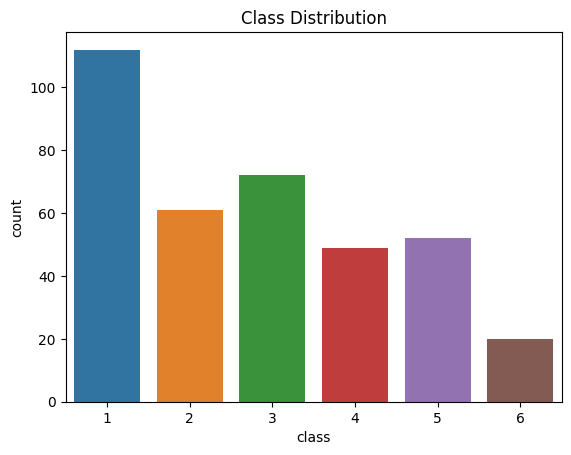

In [5]:
# Count plot for target variable (e.g., Class)
sns.countplot(x=data['class'], data=data)  # Replace 'class' with your target column #x=data['class']
plt.title('Class Distribution')
plt.show()

# Using Bivariate Analysis

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'numcolumns' contains the list of numerical column names (excluding 'Age' itself)
numcolumns = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col != 'Age']

# Create a figure with multiple subplots
plt.figure(figsize=(15, 30))  # Adjust size as needed
windnum = 1

# Loop through all numerical columns to plot against 'Age'
for feature in numcolumns:
    plt.subplot(12, 3, windnum)  # Adjust grid size as needed
    sns.scatterplot(x=data[feature], y=data['class'], color='blue')
    plt.title(f'Scatter Plot: class vs {feature}', fontsize=12)
    windnum += 1

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


## Using Multivariate Analysis
# 1. Pairplot

In [17]:
## Using pair plot finding distribution of data
sns.pairplot(data)


In [19]:
cor = data.select_dtypes(include=['int', 'float']).corr()
cor

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,...,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.003724,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,...,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,0.017285,-0.468688
definite_borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,...,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,0.137866,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,...,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.046546,0.054772
koebner_phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,...,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,0.080599,-0.091323
polygonal_papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,...,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.095935,0.057785
follicular_papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,...,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,-0.370436,0.477813
oral_mucosal_involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,...,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.110527,0.055805
knee_and_elbow_involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,...,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,-0.077278,-0.383305
scalp_involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,...,0.488804,-0.252483,-0.420718,-0.257210,-0.051894,-0.017352,0.035152,-0.249975,0.037349,-0.533208


In [20]:
## Using heatmap for finding high correlation
plt.figure(figsize=(18, 20))
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [21]:
data.var()

erythema                                      0.441897
scaling                                       0.492140
definite_borders                              0.823602
itching                                       1.295726
koebner_phenomenon                            0.824493
polygonal_papules                             0.916476
follicular_papules                            0.325571
oral_mucosal_involvement                      0.695801
knee_and_elbow_involvement                    0.966247
scalp_involvement                             0.820181
family_history                                0.110188
melanin_incontinence                          0.756584
eosinophils_in_the_infiltrate                 0.169571
PNL_infiltrate                                0.664960
fibrosis_of_the_papillary_dermis              0.727846
exocytosis                                    1.219740
acanthosis                                    0.507673
hyperkeratosis                                0.573224
parakerato

# Data Preprocessing / Feature Engineering

In [7]:
# Finding null values of dataset
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [23]:
# Duplicate handled
data.duplicated().sum() 

0

## Removing Unwanted Features

In [24]:
## droping High correlated and low correlated data using heatmap 
data.drop(['follicular_papules', 
           'oral_mucosal_involvement', 
           'family_history',
           'thinning_of_the_suprapapillary_epidermis', 
           'vacuolisation_and_damage_of_basal_layer',
           'perifollicular_parakeratosis', 
           'follicular_horn_plug', 
           'eosinophils_in_the_infiltrate',
           'band-like_infiltrate', 
           'exocytosis'], axis=1, inplace=True)

## Handling outliers using box plot

In [25]:
# Visualize outliers for all numerical columns
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

for feature in numerical_features:
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

# Filtering outliers using IQR method

In [26]:
# Using IQR method for detecting outliers in numerical columns
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers
data_no_outliers = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
# Check the shape of the data after removing outliers
print(data_no_outliers.shape)

(43, 25)


In [27]:
 data['class'].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

### Spliting and Balencing Data

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('class', axis=1)
y = data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE: {y_train.value_counts()}")
print(f"After SMOTE: {y_train_resampled.value_counts()}")


Before SMOTE: class
1    81
3    59
2    52
5    42
4    41
6    17
Name: count, dtype: int64
After SMOTE: class
5    81
2    81
1    81
4    81
3    81
6    81
Name: count, dtype: int64


In [29]:
data['class'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

## Scale Handling

In [30]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Model Implimentation

### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=42)

### Model Evaluation

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9864864864864865
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      0.67      0.80         3

    accuracy                           0.99        74
   macro avg       0.98      0.94      0.96        74
weighted avg       0.99      0.99      0.99        74

[[31  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  2]]


### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train_resampled)

# Evaluate accuracy
lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test_scaled))
print(f"Logistic Regression Accuracy: {lr_accuracy}")


# Predict using the test data
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Logistic Regression Accuracy: 0.972972972972973
Accuracy: 97.30%

Confusion Matrix:
[[30  0  0  0  0  1]
 [ 0  9  0  0  0  0]
 [ 0  0 12  1  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  3]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       1.00      1.00      1.00         9
           3       1.00      0.92      0.96        13
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        10
           6       0.75      1.00      0.86         3

    accuracy                           0.97        74
   macro avg       0.94      0.98      0.96        74
weighted avg       0.98      0.97      0.97        74



### Support Vector Machine

In [34]:
from sklearn.svm import SVC

# Initialize and train Support Vector Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train_resampled)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test_scaled))
print(f"SVM Accuracy: {svm_accuracy}")


# Predict using the test data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

SVM Accuracy: 0.9864864864864865
Accuracy: 98.65%

Confusion Matrix:
[[30  0  0  0  0  1]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  3]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       0.75      1.00      0.86         3

    accuracy                           0.99        74
   macro avg       0.96      0.99      0.97        74
weighted avg       0.99      0.99      0.99        74



## Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train_resampled)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test_scaled))
print(f"Decision Tree Accuracy: {dt_accuracy}")

# Predict using the test data
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Decision Tree Accuracy: 0.9459459459459459
Accuracy: 94.59%

Confusion Matrix:
[[30  1  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 12  1  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 10  0]
 [ 0  2  0  0  0  1]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.75      1.00      0.86         9
           3       1.00      0.92      0.96        13
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        10
           6       1.00      0.33      0.50         3

    accuracy                           0.95        74
   macro avg       0.94      0.87      0.87        74
weighted avg       0.96      0.95      0.94        74



# Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier  ##decision trees
# Initialize and train the Gradient Boosting model  ##random_state = 42 = 97%,random_state=24=97%
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train_scaled, y_train_resampled)

# Evaluate accuracy
gbc_accuracy = accuracy_score(y_test, gbc_model.predict(X_test_scaled))
print(f"Gradient Boosting Classifier Accuracy: {gbc_accuracy}")
# Predict using the test data
y_pred = gbc_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Gradient Boosting Classifier Accuracy: 0.9459459459459459
Accuracy: 94.59%

Confusion Matrix:
[[30  1  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  2  0  0  0  1]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.69      1.00      0.82         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      0.33      0.50         3

    accuracy                           0.95        74
   macro avg       0.95      0.86      0.87        74
weighted avg       0.96      0.95      0.94        74



# Hyperperametric Tuning

### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a RandomForest model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid to search
param_grid_rf = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Setup GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Score: {grid_search_rf.best_score_}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Score: 0.962478082992402


### Support Vector Machine

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an SVM model
svm = SVC(random_state=42)

# Define parameter grid to search
param_grid_svm = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf', 'poly'], 
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Setup GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Best Score: {grid_search_svm.best_score_}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.948626534190532


### Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create a GradientBoosting model
gb = GradientBoostingClassifier(random_state=42)

# Define parameter grid to search
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Setup GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search_gb.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search_gb.best_params_}")
print(f"Best Score: {grid_search_gb.best_score_}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.9521332554061953


# Retraining and Reanalyzing model

### RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate Random Forest
rf = RandomForestClassifier(random_state=42)

# Retrain the model on the full training data
rf.fit(X_train, y_train)

# Predictions on test data
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest model
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Evaluation:
Accuracy: 0.9865
Confusion Matrix:
[[31  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  2]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      0.67      0.80         3

    accuracy                           0.99        74
   macro avg       0.98      0.94      0.96        74
weighted avg       0.99      0.99      0.99        74



### Support Vector Machine

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate Support Vector Classifier
svm = SVC(random_state=42)

# Retrain the model on the full training data
svm.fit(X_train, y_train)

# Predictions on test data
y_pred_svm = svm.predict(X_test)

# Evaluate Support Vector Classifier model
print("\nSupport Vector Classifier (SVC) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))



Support Vector Classifier (SVC) Evaluation:
Accuracy: 0.7027
Confusion Matrix:
[[29  0  0  0  0  2]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  8  0  0  0  0]
 [ 3  7  0  0  0  0]
 [ 0  2  0  0  0  1]]
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.94      0.92        31
           2       0.35      1.00      0.51         9
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       0.33      0.33      0.33         3

    accuracy                           0.70        74
   macro avg       0.43      0.54      0.46        74
weighted avg       0.61      0.70      0.64        74



### Gradient Boosting Classifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Retrain the model on the full training data
gb.fit(X_train, y_train)

# Predictions on test data
y_pred_gb = gb.predict(X_test)

# Evaluate Gradient Boosting Classifier model
print("\nGradient Boosting Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))



Gradient Boosting Classifier Evaluation:
Accuracy: 0.9730
Confusion Matrix:
[[31  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 10  0]
 [ 0  2  0  0  0  1]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      0.33      0.50         3

    accuracy                           0.97        74
   macro avg       0.97      0.89      0.90        74
weighted avg       0.98      0.97      0.97        74



# Using Randomized Search CV

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter grid for Random Forest
param_dist = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Set up the RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                      n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Get the best parameters and model
print(f"Best Parameters for Random Forest: {random_search_rf.best_params_}")
print(f"Best Score for Random Forest: {random_search_rf.best_score_:.4f}")

# Get the best model and make predictions
best_rf_model = random_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best Random Forest model
from sklearn.metrics import accuracy_score
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Best Score for Random Forest: 0.9625
Random Forest Accuracy: 1.0000


In [44]:
from sklearn.svm import SVC

# Define the parameter grid for SVC
param_dist_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize SVC
svc = SVC(random_state=42)

# Set up the RandomizedSearchCV for SVC
random_search_svc = RandomizedSearchCV(estimator=svc, param_distributions=param_dist_svc, 
                                       n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV
random_search_svc.fit(X_train, y_train)

# Get the best parameters and model
print(f"Best Parameters for SVC: {random_search_svc.best_params_}")
print(f"Best Score for SVC: {random_search_svc.best_score_:.4f}")

# Get the best model and make predictions
best_svc_model = random_search_svc.best_estimator_
y_pred_svc = best_svc_model.predict(X_test)

# Evaluate the best SVC model
print(f"SVC Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for SVC: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Best Score for SVC: 0.9486
SVC Accuracy: 0.9459


In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for Gradient Boosting
param_dist_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Set up the RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_dist_gb, 
                                      n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV
random_search_gb.fit(X_train, y_train)

# Get the best parameters and model
print(f"Best Parameters for Gradient Boosting: {random_search_gb.best_params_}")
print(f"Best Score for Gradient Boosting: {random_search_gb.best_score_:.4f}")

# Get the best model and make predictions
best_gb_model = random_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the best Gradient Boosting model
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01}
Best Score for Gradient Boosting: 0.9386
Gradient Boosting Accuracy: 0.9730


# Best Model

In [46]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")

# Retrain the model with best parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the tuned model
print(f"Accuracy after tuning: {accuracy_score(y_test, y_pred_best_rf):.4f}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9625
Accuracy after tuning: 1.0000


# Model Comparision

In [47]:
import pandas as pd

# Collecting the results for comparison
results = {
    'Model': ['Random Forest', 'SVC', 'Gradient Boosting'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_gb)
    ],
    'F1-Score': [
        classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_svm, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_gb, output_dict=True)['weighted avg']['f1-score']
    ]
}

# Create DataFrame for model comparison
comparison_df = pd.DataFrame(results)

# Display model comparison
print("\nModel Comparison:")
print(comparison_df)



Model Comparison:
               Model  Accuracy  F1-Score
0      Random Forest  1.000000  1.000000
1                SVC  0.702703  0.637409
2  Gradient Boosting  0.972973  0.966679


# Best Model
Based on the comparison, the Random Forest model stands out as the most effective, achieving perfect accuracy and F1-score. However, it's crucial to address potential overfitting through cross-validation to ensure it generalizes well. Gradient Boosting also offers strong results, though not as high as Random Forest. SVC performed relatively poorly, indicating a need for hyperparameter tuning or data preprocessing for improvement.

## Challenges Faced

 1. Data Quality Issues:
    Missing Values: The dataset might have missing values (e.g., '?' in the Age column). 
    Handling such missing data can be tricky and requires careful imputation or removal to avoid biasing the model.
2. Feature Engineering and Selection:
    Choosing Relevant Features: Identifying the most important clinical and 
    histopathological features that affect skin disease diagnosis could be challenging. 
    Some features may be redundant or irrelevant.
3. Overfitting/Underfitting:
    Overfitting with Complex Models: In your case, Random Forest achieved perfect accuracy, which could indicate overfitting, especially if cross-validation isn't used. Regularization or hyperparameter tuning may help resolve this.
4. Model Selection and Tuning:
    Hyperparameter Tuning: Optimizing the models (e.g., Random Forest, Gradient Boosting, SVC) requires careful
    tuning of hyperparameters such as max_depth, n_estimators, or C for SVC. This can be a time-consuming task,
    especially if the dataset is large.
6. Data Preprocessing:
    Data Leakage: Ensuring no data leakage occurs is crucial. 
    Handling Outliers: Identifying and handling outliers is important as they can have a significant impact on
    model performance, particularly for algorithms like SVC.
7. Evaluation:
    Metrics Selection: Choosing the right evaluation metrics (accuracy vs. F1-score) for the task at hand
    is important, especially in imbalanced datasets where accuracy might not provide a full picture.
8. Model Deployment:
    Real-Time Predictions: Deploying a trained model for real-time predictions in clinical
    settings might face challenges like latency or integration with existing systems.
    

# Conclusion:
 These challenges are common in machine learning-based healthcare projects. Addressing them requires a combination of good data preprocessing, model tuning, and validation techniques. Additionally, collaboration with domain experts (like dermatologists) ensures the model's practical applicability and reliability.








In [48]:

import pickle
with open('Skin_disorder.pkl', 'wb') as file:
    pickle.dump(data, file)

print("Skin Disorder file has been saved as a pickle file!")

Skin Disorder file has been saved as a pickle file!


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('Priority', axis=1)
y = data['Priority']

# Split the dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Ensures all classes appear in both sets
)

# Apply SMOTE with adjusted k_neighbors
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE:\n{y_train.value_counts()}")
print(f"After SMOTE:\n{y_train_resampled.value_counts()}")
print(f"y_test distribution:\n{y_test.value_counts()}")  # Check if class 1 appears in test set




This output confirms that your Stratified K-Fold cross-validation is working correctly. ✅
Each fold has 37,284 - 37,285 training samples and 9,321 - 9,322 test samples, ensuring class balance across splits.




    from sklearn.model_selection import StratifiedKFold

# Define Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Print train-test indices for each fold
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), start=1):
    print(f"Fold {fold}:")
    print(f"  Train indices: {train_idx[:10]}... ({len(train_idx)} samples)")
    print(f"  Test indices: {test_idx[:10]}... ({len(test_idx)} samples)")
    print("-" * 50)







Step 1: Check Data Distribution
Use the following code to analyze feature distributions before choosing a scaler:


import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(20, 18))

# Get number of numerical features
num_cols = len(numerical_features.columns)

# Determine grid layout (adjust rows & columns based on number of features)
rows = (num_cols // 4) + 1  # Adjust the number of rows
cols = 4  # Number of columns per row

# Plot histograms with KDE
for i, col in enumerate(numerical_features.columns):
    plt.subplot(rows, cols, i + 1)  # Corrected subplot format
    
    # Plot histogram
    sns.histplot(numerical_features[col], bins=30, color='skyblue', edgecolor='black')
    
    # Overlay KDE plot separately to control color
    sns.kdeplot(numerical_features[col], color='red', linewidth=2)

    plt.title(col, fontsize=12, fontweight='bold')

# Add a title to the entire figure
plt.suptitle("Distribution of Numerical Features", fontsize=16, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()







stats_df = pd.DataFrame({
    "Mean": data.mean(),
    "Standard Deviation": data.std(),
    "Min": data.min(),
    "Max": data.max()
})
print(stats_df)





### Compare the output with these expected characteristics of different scalers:

Scaler               	Mean	                 Std Dev	              Min	             Max	              Example
StandardScaler           ~0	                     ~1	            Can be negative	     Can be positive      	 -2.47 to 3.93
MinMaxScaler	    Between 0 and 1	            Varies	                   0                1                  0.0 to 1.0            
RobustScaler  Close to 0 (Median-based)	    Scale based on IQR	      Can be negative	Can be positive	     -2.17e+05 to 3.62e+05





✅ Apply MinMaxScaler to the Entire Dataset (Common Approach)


from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Fit and transform train data
X_test_scaled = scaler.transform(X_test)  # Transform test data (no fitting)




# Convert back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_resampled.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check distribution of 'Priority' in y_train_resampled
print(y_train_resampled.value_counts())



X_train_scaled_df['Priority'] = y_train_resampled.values
print(X_train_scaled_df['Priority'].value_counts())



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
model = RandomForestClassifier(random_state=42)

# Train model
model.fit(X_train_scaled, y_train_resampled)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


print(y_test.value_counts()) 